# Vancouver Housing Data 2025 – Part 3: Exploratory Data Analysis (EAD) – Multivariate

This notebook presents a **multivariate exploratory analysis** based on the univariate insights generated in Part 2.  
The objective is to investigate how housing age and income indicators interact across Metro Vancouver jurisdictions.

We move beyond individual variable distributions to examine potential relationships, patterns, and groupings that may emerge when analyzing the variables together.

Key techniques explored in this notebook include:

- Cross-variable visualizations and correlation analysis  
- Grouping jurisdictions by housing age and income characteristics  
- Dimensionality reduction using **Principal Component Analysis (PCA)**  
- Clustering municipalities with similar housing and income profiles

These analyses aim to uncover **hidden structures and regional clusters**, providing actionable insights for urban planning, housing policy, and targeted interventions.

---

## 1. Project Summary and Previous Findings

This project explores regional disparities in housing conditions across Metro Vancouver, focusing on two key dimensions:  
- 🏚️ Aging profile of owner-occupied housing stock  
- 💰 Median after-tax household income and its growth (2015–2020)

In **Part 1**, we built the cleaned dataset from Metro Vancouver Housing Data Book 2025.  
In **Part 2**, we conducted a univariate descriptive analysis that highlighted major regional contrasts in both housing and income indicators.

In this notebook, we connect these indicators to explore relationships, reveal clusters, and reduce dimensionality for deeper insights.

---

### Part 3 – Objectives

- Visualize and quantify relationships between housing age and income indicators  
- Analyze correlations across selected variables  
- Apply **Principal Component Analysis (PCA)** to reduce dimensionality and identify key variation axes  
- Perform clustering to group municipalities with similar profiles  
- Interpret results to support region-specific recommendations and policy design

---

### Data Sources

- Dataset: `merged_housing_income_data.pkl`  
- Key variables:
  - `percent_40plus` – % of dwellings built before 1981  
  - `growth_index` – proportion of homes built after 2005  
  - `income_2020_total`, `income_2015_total`, `change_total_2015_2020`  
  - PCA components and cluster labels (to be generated)

Source:  
[Metro Vancouver Housing Data Book 2025](https://metrovancouver.org/services/regional-planning/housing-data-book),  
retrieved from the Metro Vancouver Regional Planning Division.

---

### Final Output

This multivariate analysis enables a richer understanding of regional dynamics by combining housing and income indicators.  
It helps uncover municipality clusters with shared characteristics, highlights outliers, and reduces data complexity.  
The results will support targeted housing strategies and serve as a foundation for interactive dashboards or advanced modeling in future stages.

---

## 2. Load Dataset

In this section, we load the cleaned and merged dataset prepared in Part 1 and enhanced in Part 2.  
The dataset combines housing and income indicators for each Metro Vancouver jurisdiction.

In Part 2, we added a key variable:  
- `percent_40plus` – the percentage of owner-occupied dwellings built before 1981, used as a proxy for aging housing stock.

This enriched dataset now serves as the foundation for our **multivariate analysis**, including correlation assessment, dimensionality reduction (PCA), and clustering of municipalities based on similar profiles.

In [3]:
# Load the updated dataset from Pickle format
import pandas as pd

df = pd.read_pickle("merged_housing_income_data_updated.pkl")

# Quick check: dimensions and columns
print(f"✅ Dataset loaded successfully: {df.shape[0]} rows × {df.shape[1]} columns")
df.columns

✅ Dataset loaded successfully: 23 rows × 16 columns


Index(['jurisdiction', 'total_owner_occupied', 'built_2016_2021',
       'built_2011_2015', 'built_2001_2010', 'built_1991_2000',
       'built_1981_1990', 'built_1971_1980', 'built_1961_1970',
       'built_pre_1961', 'income_2015_after_tax', 'income_2020_after_tax',
       'change_after_tax_2015_2020', 'total_units', 'units_40plus',
       'percent_40plus'],
      dtype='object')

---
## 4. Cross-variable Exploration 

In this section, we explore relationships between key housing and income indicators across Metro Vancouver jurisdictions.  
The goal is to move beyond univariate distributions and begin identifying **interactions and patterns** between variables.

We use a combination of:

- **Scatterplots** to visualize possible correlations or trade-offs (e.g., between housing age and income)
- **Crosstab-style grouping** or ranking to compare jurisdictions across indicator combinations
- **Basic segmentation** to identify clusters based on value ranges (e.g., high-income & older housing vs low-income & newer housing)

These visual and comparative analyses will guide the selection of variables for further multivariate techniques such as **PCA** and **clustering** in the following steps.

---
### Block 1: Housing Age vs Income 2020  
**Scatter plot: `percent_40plus` vs `income_2020_total`**

This plot explores the relationship between the age of the housing stock and the median after-tax household income in 2020.  
By comparing the share of dwellings built before 1981 (`percent_40plus`) with income levels across jurisdictions, we aim to identify patterns such as:

- Do wealthier areas tend to have older housing stock?  
- Are newer-growth municipalities associated with lower or rising income levels?

The scatterplot helps uncover regional contrasts and potential trade-offs between affluence and housing age — insights that can support urban renewal and policy strategies.

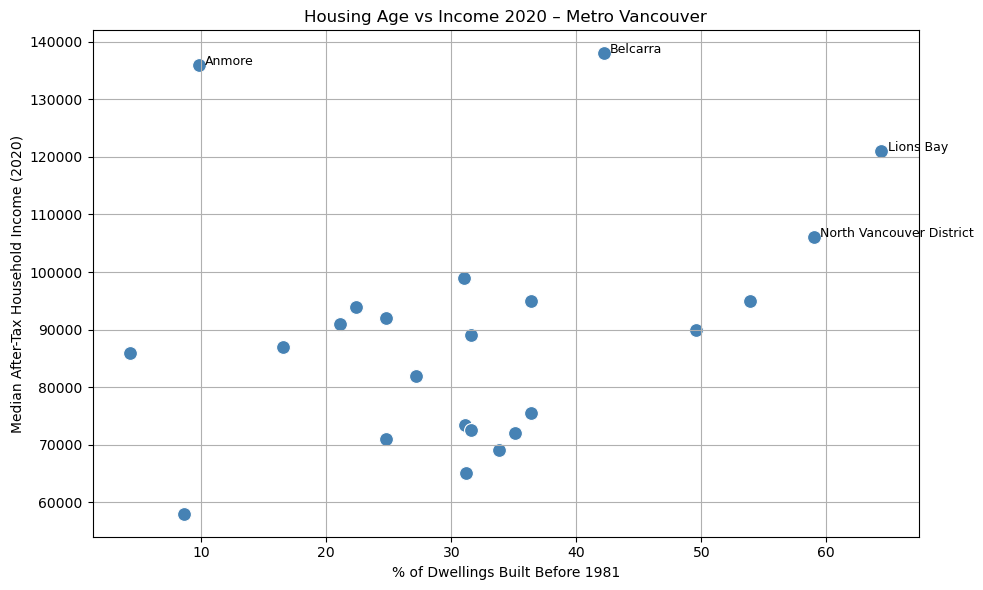

📈 Pearson correlation: 0.28


In [25]:
# Step 1 – Check available columns
df.columns.tolist

# Step 2 – Select relevant variables for analysis
df_block1 = df[['jurisdiction', 'percent_40plus', 'income_2020_after_tax']].copy()

# Drop missing values if any
df_block1.dropna(subset=['percent_40plus', 'income_2020_after_tax'], inplace=True)

# Step 3 – Create scatter plot: Housing Age vs Income
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))

sns.scatterplot(
    data=df_block1,
    x='percent_40plus',
    y='income_2020_after_tax',
    s=100,
    color='steelblue'
)

# Annotate outliers or interesting cases
for i, row in df_block1.iterrows():
    if row['income_2020_after_tax'] > 100000 or row['percent_40plus'] > 60:
        plt.text(row['percent_40plus'] + 0.5, row['income_2020_after_tax'], row['jurisdiction'], fontsize=9)

plt.xlabel('% of Dwellings Built Before 1981')
plt.ylabel('Median After-Tax Household Income (2020)')
plt.title('Housing Age vs Income 2020 – Metro Vancouver')
plt.grid(True)
plt.tight_layout()
plt.show()

# Step 4 – Calculate Pearson correlation between the variables
correlation = df_block1['percent_40plus'].corr(df_block1['income_2020_after_tax'])
print(f"📈 Pearson correlation: {correlation:.2f}")



### Insights – Housing Age vs Income 2020

- The scatterplot reveals **no strong linear relationship** between housing age (`percent_40plus`) and median after-tax income.
- A few **high-income jurisdictions** (e.g., Belcarra, Lions Bay, Anmore) show **wide variation** in housing age, suggesting that affluence is not directly tied to newer or older housing stock.
- The overall **Pearson correlation of 0.28** confirms a weak and possibly non-significant association.
- This suggests that **other factors** — such as geography, density, or zoning policies — may play a greater role in explaining income differences.

### Block 2: Housing Age vs Income Growth 

**Scatter plot: `percent_40plus` vs `change_after_tax_2015_2020`**

This block explores whether there's a relationship between the age of the housing stock and recent income dynamics across Metro Vancouver jurisdictions.  
By plotting the share of older dwellings (`percent_40plus`) against the percentage change in after-tax income between 2015 and 2020, we aim to answer questions like:

- Are newer-growth areas experiencing faster income growth?  
- Do older, established municipalities show income stagnation or stability?

This analysis helps reveal whether economic growth is concentrated in recently developed regions or if it is evenly distributed across the housing age spectrum.


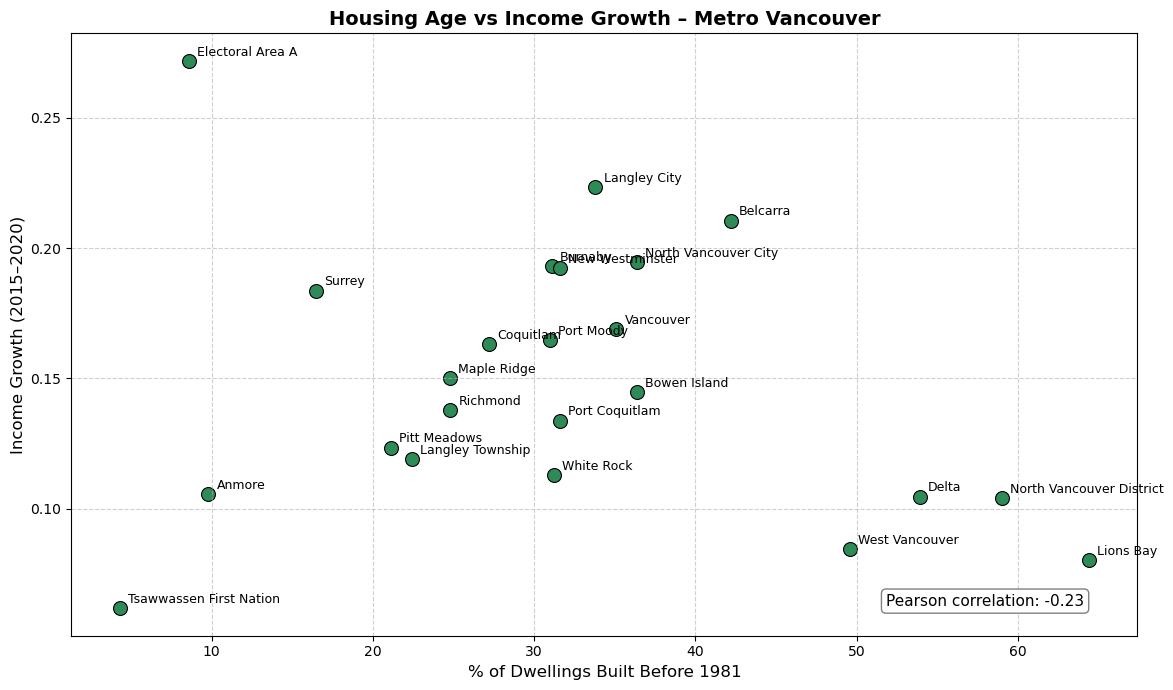

In [5]:
# Step 1 – Select variables for this block
df_block2 = df[['jurisdiction', 'percent_40plus', 'change_after_tax_2015_2020']].copy()

# Step 2 – Drop missing values
df_block2.dropna(subset=['percent_40plus', 'change_after_tax_2015_2020'], inplace=True)

# Step 3 – Calculate Pearson correlation
correlation = df_block2['percent_40plus'].corr(df_block2['change_after_tax_2015_2020'])

# Step 4 – Create and format the plot
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 7))
ax = sns.scatterplot(
    data=df_block2,
    x='percent_40plus',
    y='change_after_tax_2015_2020',
    s=100,
    color='#2E8B57',  # darker green
    edgecolor='black'
)

# Step 5 – Add labels to all points
for i, row in df_block2.iterrows():
    ax.text(row['percent_40plus'] + 0.5,
            row['change_after_tax_2015_2020'] + 0.002,
            row['jurisdiction'],
            fontsize=9,
            color='black')

# Step 6 – Customize axis, grid, and title
ax.set_xlabel('% of Dwellings Built Before 1981', fontsize=12)
ax.set_ylabel('Income Growth (2015–2020)', fontsize=12)
ax.set_title('Housing Age vs Income Growth – Metro Vancouver', fontsize=14, weight='bold')
ax.grid(True, linestyle='--', alpha=0.6)

# Step 7 – Annotate Pearson correlation
ax.annotate(f'Pearson correlation: {correlation:.2f}',
            xy=(0.95, 0.05),
            xycoords='axes fraction',
            ha='right',
            fontsize=11,
            bbox=dict(boxstyle='round,pad=0.3', facecolor='white', edgecolor='gray'))

plt.tight_layout()
plt.show()


### Insights – Housing Age vs Income Growth

- While the Pearson correlation between housing age (`percent_40plus`) and income growth (2015–2020) is weak and negative (-0.23), the scatterplot reveals important **visual clusters** across municipalities.
- Jurisdictions like **Langley City**, **Electoral Area A**, and **Belcarra** combine **low-to-moderate housing age** with **strong income growth**, suggesting recent development and economic momentum.
- On the other hand, places like **Lions Bay**, **West Vancouver**, and **North Vancouver District** show a **high share of older housing** with **lower income growth**, possibly reflecting market maturity or limited expansion capacity.
- These patterns, while not linearly correlated, reveal **distinct regional profiles** that are not captured in univariate statistics alone.

To further explore these contrasts, we will now create **bins** based on:

- **Income level** (e.g., low / medium / high income)
- **Housing age profile** (e.g., newer / mixed / older stock)

This allows us to examine combinations (e.g., *high income + older housing*, *low income + newer housing*) and assess whether particular categories dominate certain regions.

We’ll use tools like `pd.crosstab()` and `groupby()` to **summarize and rank municipalities by group**, laying the groundwork for the clustering analysis in Part 3.

---
### Block 3: Grouping by Income Level and Housing Age Profile  
**Categorical Binning + Crosstab Analysis**

In this block, we transition from continuous indicators to categorized profiles by creating **discrete bins** for key variables:

- **Income level** – grouped into low, medium, and high
- **Growth income level** - grouped into low, medium, and high
- **Housing age** – based on the share of dwellings built before 1981 (categorized as newer, mixed, or older stock)

This categorical approach allows us to:

- Better identify **patterns** and **contrasts** between municipality types
- Summarize findings using **`pd.crosstab()`** and **`groupby()`** tables
- Examine intersections like *high income + older housing*, *low income + newer housing*, etc.

These groupings provide a simplified lens to compare jurisdictions and will help **validate or inspire clusters** in the upcoming multivariate analysis.


---
#### Note on Categorization Criteria

The **income/income growth** and **housing age** groups used in this analysis are **preliminary and exploratory**.  
They are based on binning strategies intended to simplify comparison across Metro Vancouver jurisdictions:

- **Income-based groupings** (`income_group`) and **growth-based groupings** (`growth_group`) were created using `pd.qcut()` to divide municipalities into three equal-sized tiers:
  - *Low*, *Middle*, and *High Income*, or  
  - *Low*, *Middle*, and *High Income Growth*  
  These categories are **data-driven** and designed to balance sample size across groups. Cutoffs may vary by dataset distribution and are **not tied to external policy thresholds**.

- **Housing age categories** (`age_group`) were defined using fixed thresholds based on the percentage of dwellings built before 1981:
  - 🟢 *Newer Stock*: 0–20% older homes  
  - 🟡 *Moderately Aged*: 21–35%  
  - 🟠 *Aged Stock*: 36–45%  
  - 🔴 *Older Stock*: above 45%  
  These cutoffs are **conceptual and arbitrary**, meant to reflect varying degrees of housing aging. They can be refined in future iterations based on historical zoning trends, renovation patterns, or expert consultation.

These preliminary groupings offer a useful starting point to detect spatial and socioeconomic contrasts.  
They also help inform subsequent steps in the project, such as **clustering** and **dimensionality reduction**, where continuous variables can be re-evaluated in multivariate form.

---
#### Income Level vs Housing Age Group

This section explores how **municipal income levels** relate to **the age profile** of owner-occupied housing stock across Metro Vancouver.

Municipalities are categorized into **Low**, **Middle**, and **High Income** groups based on their 2020 after-tax household income, using tertiles (equal-size bins).

We present a crosstab in absolute numbers followed by a percentage distribution, revealing whether wealthier municipalities tend to have newer or older housing stocks — a critical factor for understanding spatial inequalities, infrastructure demands, and urban renewal needs.

---

In [11]:
# Step 1 – Create income level bins (Low, Middle, High)
df['income_group'] = pd.qcut(
    df['income_2020_after_tax'],
    q=3,
    labels=['Low Income', 'Middle Income', 'High Income']
)

# Step 2 – Redefine housing age categories using 4 brackets
df['age_group'] = pd.cut(
    df['percent_40plus'],
    bins=[0, 20, 35, 45, 100],
    labels=['Newer Stock', 'Moderately Aged', 'Aged Stock', 'Older Stock']
)

# Step 3 – Quick check: frequency count
print("Income group distribution:")
print(df['income_group'].value_counts())
print("\nHousing age group distribution:")
print(df['age_group'].value_counts())

# Step 4 – Crosstab in absolute numbers
ct_absolute = pd.crosstab(df['income_group'], df['age_group'])
print("\nCrosstab – Number of Municipalities by Income and Housing Age Group")
display(ct_absolute)

# Step 5 – Crosstab in percentage by row
ct_percent = pd.crosstab(df['income_group'], df['age_group'], normalize='index') * 100
ct_percent = ct_percent.round(1)

print("\n Crosstab – % of Municipalities by Income and Housing Age Group")
display(ct_percent)


Income group distribution:
income_group
Low Income       8
High Income      8
Middle Income    7
Name: count, dtype: int64

Housing age group distribution:
age_group
Moderately Aged    11
Newer Stock         4
Aged Stock          4
Older Stock         4
Name: count, dtype: int64

Crosstab – Number of Municipalities by Income and Housing Age Group


age_group,Newer Stock,Moderately Aged,Aged Stock,Older Stock
income_group,,,,
Low Income,1,5,2,0
Middle Income,2,4,0,1
High Income,1,2,2,3



 Crosstab – % of Municipalities by Income and Housing Age Group


age_group,Newer Stock,Moderately Aged,Aged Stock,Older Stock
income_group,,,,
Low Income,12.5,62.5,25.0,0.0
Middle Income,28.6,57.1,0.0,14.3
High Income,12.5,25.0,25.0,37.5


---
#### Insights - Income Level vs Housing Age Group

- **Low-income municipalities** are concentrated in **moderately aged housing areas** (62.5%) and show no presence in the “Older Stock” group.
  - These areas may represent **older suburban zones**, developed decades ago but not deeply aged.

- **Middle-income municipalities** are split across **newer** and **moderately aged** housing profiles (85.7%), with a small share (14.3%) in **Older Stock**.
  - This group may reflect **transitional neighborhoods** experiencing demographic shifts or partial revitalization.

- **High-income municipalities** are the **only group with significant presence in the “Older Stock” category** (37.5%).
  - This supports the idea that **wealthier areas can include highly consolidated and historic neighborhoods** (e.g., West Vancouver, Lions Bay), where aging stock correlates with prestige, not decline.


---
#### Income Growth vs Housing Age Group

This section explores how **municipal income growth** relates to the **age profile of owner-occupied housing stock** across Metro Vancouver jurisdictions.

Municipalities are grouped into **Low Growth**, **Middle Growth**, and **High Growth** categories based on the **percentage change in after-tax household income between 2015 and 2020**, using tertiles (equal-size bins).

We present both an **absolute count crosstab** and a **percentage-based distribution**, allowing us to identify whether faster-growing municipalities are located in areas with newer housing infrastructure, or if income growth is occurring independently of housing age.

This analysis supports a better understanding of how **economic momentum interacts with housing infrastructure**, revealing potential areas for targeted investment, redevelopment, or policy focus.

In [13]:
# Step 1 – Create growth groups based on income change (2020 vs 2015)
df['growth_group'] = pd.qcut(
    df['change_after_tax_2015_2020'],
    q=3,
    labels=['Low Growth', 'Middle Growth', 'High Growth']
)

# Step 2 – Define housing age categories based on % of dwellings built before 1981
df['age_group'] = pd.cut(
    df['percent_40plus'],
    bins=[0, 20, 35, 45, 100],
    labels=['Newer Stock', 'Moderately Aged', 'Aged Stock', 'Older Stock']
)

# Step 3 – Display category distributions
print("Income growth group distribution:")
print(df['growth_group'].value_counts())

print("\nHousing age group distribution:")
print(df['age_group'].value_counts())

# Step 4 – Crosstab: absolute number of municipalities per category
ct_growth_absolute = pd.crosstab(df['growth_group'], df['age_group'])
print("\n  Crosstab – Number of Municipalities by Income Growth and Housing Age Group")
display(ct_growth_absolute)

# Step 5 – Crosstab: percentage distribution per row
ct_growth_percent = pd.crosstab(df['growth_group'], df['age_group'], normalize='index') * 100
ct_growth_percent = ct_growth_percent.round(1)

print("\n Crosstab – % of Municipalities by Income Growth and Housing Age Group")
display(ct_growth_percent)

Income growth group distribution:
growth_group
Low Growth       8
High Growth      8
Middle Growth    7
Name: count, dtype: int64

Housing age group distribution:
age_group
Moderately Aged    11
Newer Stock         4
Aged Stock          4
Older Stock         4
Name: count, dtype: int64

  Crosstab – Number of Municipalities by Income Growth and Housing Age Group


age_group,Newer Stock,Moderately Aged,Aged Stock,Older Stock
growth_group,,,,
Low Growth,2,2,0,4
Middle Growth,0,6,1,0
High Growth,2,3,3,0



 Crosstab – % of Municipalities by Income Growth and Housing Age Group


age_group,Newer Stock,Moderately Aged,Aged Stock,Older Stock
growth_group,,,,
Low Growth,25.0,25.0,0.0,50.0
Middle Growth,0.0,85.7,14.3,0.0
High Growth,25.0,37.5,37.5,0.0


---
#### Insights – Income Growth vs Housing Age Group

- **Low Growth municipalities** are predominantly located in areas with **older housing stock**:

  - 🔴 50% of them fall into the "Older Stock" category (45%+ of homes built before 1981).  
  - This suggests a potential link between **aging infrastructure and economic stagnation**, where lack of housing renewal may constrain income growth.
<br>

- **Middle Growth municipalities** are highly concentrated in the **Moderately Aged** category (20–35% older homes):

  - 🟡 85.7% fall into this range, indicating a **homogeneous development profile**.  
  - These areas may be relatively stable, with neither aggressive renewal nor deep aging, possibly reflecting **mature suburbs or balanced growth corridors**.
<br>

- **High Growth municipalities** are more diversified but notably absent from the "Older Stock" group:

  - 🟢 25% are in “Newer Stock” and 🟠 37.5% each in “Moderately Aged” and “Aged Stock”.  
  - Their **absence in the most aged category** supports the idea that **recent or renewed housing environments** are more likely to experience strong income growth.

---

## 4. Key Takeaways – Income Growth vs Housing Age Group

- **Low Growth municipalities** tend to have significantly older housing stock:

  ▪️ 🟥 **50%** of them fall into the **"Older Stock"** category (45%+ of dwellings built before 1981).  
  ▪️ This pattern suggests that **aging housing infrastructure may hinder income growth**, potentially due to lack of investment, maintenance burdens, or stagnating urban development.

<br/>

- **Middle Growth municipalities** are **highly concentrated** in the **"Moderately Aged"** category (20–35% older homes):

  ▪️ 🟡 **85.7%** of them fall in this range.  
  ▪️ These municipalities may represent **stable, mature suburbs** with balanced development — not too old to limit growth, but not undergoing intensive renewal either.

<br/>

- **High Growth municipalities** are associated with **more diverse and newer housing environments**:

  ▪️ 🟢 **25%** of them are in the **"Newer Stock"** category.  
  ▪️ 🟠 **37.5%** are in both **"Moderately Aged"** and **"Aged Stock"** categories.  
  ▪️ Notably, **none** of the high-growth municipalities fall into the **"Older Stock"** group.  
  ▪️ This supports the idea that **recent or actively renewed housing stock is a key enabler of income growth**.
---

## 5. Export Final Dataset

To enable future reuse and integration into multivariate modeling (e.g., clustering or PCA), we export the final enriched dataset.

This dataset includes:

- Jurisdiction-level indicators of housing stock age (percent_40plus)
- Income and income growth metrics (after-tax, 2015–2020)
- Categorized bins for income level, income growth, and housing age
- Ready for use in Part 4: Clustering and Risk Typology

Two files are saved:
- 🟦 `final_dataset_income_housing.pkl` for efficient loading in Python
- 📄 `final_dataset_income_housing.csv` for external inspection or sharing


In [20]:
# Step 1 – Export the final dataset to a pickle file
df.to_pickle("final_dataset_income_housing.pkl")

---

## 6. Summary

In this notebook, we explored relationships between housing age, income, and income growth across Metro Vancouver.

Key steps included:

- Loading the enriched dataset with housing and income indicators.
- Creating scatter plots and calculating correlations to explore variable interactions.
- Categorizing municipalities by:
  - Income level  
  - Income growth  
  - Housing age (4 brackets)
- Using crosstabs (absolute and % values) to identify structural contrasts.
- Highlighting key patterns, such as:
  - High-income areas often have older housing stock.
  - High income growth is associated with newer or moderately aged housing.
- Exporting the final dataset for use in clustering and PCA.

---

## 7. Next Steps

This notebook concludes the current phase of the Metro Vancouver housing and income analysis. So far, we have:

- Explored key indicators such as housing age, income levels, and income growth.
- Identified structural patterns across municipalities using crosstabs and scatterplots.
- Created grouped categories to support comparison and future clustering.

To deepen this analysis, the following next steps are recommended:

---

### 1. Incorporate Additional Variables

To enrich the multivariate understanding of housing dynamics, consider adding:

- **Housing affordability metrics**:  
  e.g., median housing price, rent-to-income ratio, housing cost burden.

- **Demographic indicators**:  
  e.g., population growth, age distribution, education levels.

- **Housing condition or renovation data**:  
  if available, percentage of units recently renovated or requiring major repairs.

- **Zoning or land-use information**:  
  to understand constraints and development opportunities.

- **Transportation access**:  
  e.g., proximity to transit hubs, commute times — often linked to housing value and growth.

---

### 2. Add Geographic Analysis

Spatial visualization will help highlight **regional clusters, disparities, and transition zones**:

- Create **choropleth maps** to visualize variables like:
  - % of dwellings built before 1981  
  - Median income or income growth  
  - Cluster assignments (after PCA/clustering)

- Use **interactive mapping tools** (e.g., Folium, Plotly, or GeoPandas + Matplotlib) to enable user exploration.

- Consider integrating **municipal boundaries shapefiles** to spatially anchor your insights and support policy recommendations.

---


